# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL_set
tag = 'nohomeo'
opts = dict(homeo_method='None', verbose=0)
experiments = SHL_set(opts, tag=tag)

list_figures = ['show_dico']
list_figures = []


display_variables = ['error', 'logL', 'cputime']
display_variables = ['error', 'logL', 'perror', 'MC', 'cputime']
display_variables = ['F']


In [4]:
!ls -l {experiments.shl.cache_dir}/{tag}*
!rm -fr {experiments.shl.cache_dir}/{tag}*lock*

ls: cache_dir/nohomeo*: No such file or directory


## With different learning rates but without homeostasis

Here,we only ensure the norm ofthe filters is constant.

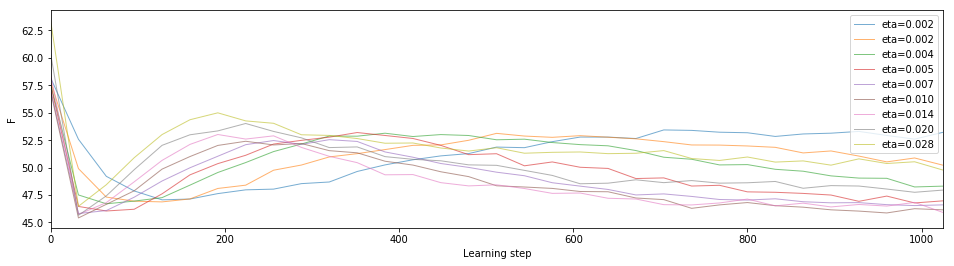

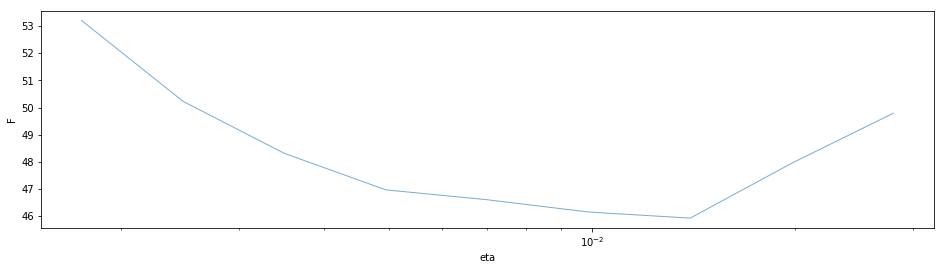

In [5]:
experiments.scan(variable='eta', list_figures=list_figures, display='')
plt.show()

for display_variable in display_variables:
    fig, ax = experiments.scan(variable='eta', list_figures=[], display='dynamic', display_variable=display_variable)
    plt.show()

for display_variable in display_variables:
    fig, ax = experiments.scan(variable='eta', list_figures=[], display='final', display_variable=display_variable)
    plt.show()

## CPU time as a function of the number of iterations

Should be linear:

In [ ]:
for variable in ['n_iter', 'batch_size']:#, 'patch_width']:
    experiments.scan(variable=variable, base=4, N_scan=5, list_figures=list_figures, display='')
    for display_variable in display_variables:
        fig_error, ax_error = experiments.scan(variable=variable, base=2, N_scan=5, list_figures=[], display='dynamic', display_variable=display_variable)
        plt.show()
    for display_variable in display_variables:
        fig, ax = experiments.scan(list_figures=[], variable=variable, base=2, N_scan=5, display='final', display_variable=display_variable)
        plt.show()

## effect of the size of imagelet


## comparing the result of learning with different sparse algorithms

In [ ]:
for display_variable in display_variables:          
    fig, ax = None, None
    for algorithm in ['lasso_lars', 'lasso_cd', 'lars', 'omp', 'mp']: # 'threshold', 
        opts = dict(homeo_method='None', learning_algorithm=algorithm, verbose=0)

        experiments = SHL_set(opts, tag=tag + ' - algorithm={}'.format(algorithm))
        experiments.scan(variable='eta', list_figures=list_figures, display='')
        fig, ax = experiments.scan(variable='eta', list_figures=[], display='final', fig=fig, ax=ax, label=algorithm, display_variable=display_variable)   
    ax.legend()
    plt.show()

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, matplotlib, shl_scripts